In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size=1550)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1550)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]

# let us zip x and y coordinates together to form a tuple
coordinates = zip(x, y)

In [1]:
type(coordinates)

NameError: name 'coordinates' is not defined

In [ ]:
coordinates

In [ ]:
len(coordinates)

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
type(coordinates)

In [10]:
# import citiPy module
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

656

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------------")

# create counters
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if( i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set{set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set1 | ushuaia
Processing Record 2 of Set1 | kodiak
Processing Record 3 of Set1 | bhainsdehi
Processing Record 4 of Set1 | bonfim
Processing Record 5 of Set1 | awbari
Processing Record 6 of Set1 | cape town
Processing Record 7 of Set1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set1 | atuona
Processing Record 9 of Set1 | mataura
Processing Record 10 of Set1 | tuktoyaktuk
Processing Record 11 of Set1 | hermanus
Processing Record 12 of Set1 | lasa
Processing Record 13 of Set1 | rikitea
Processing Record 14 of Set1 | lukovetskiy
Processing Record 15 of Set1 | jamestown
Processing Record 16 of Set1 | sioux lookout
Processing Record 17 of Set1 | rabo de peixe
Processing Record 18 of Set1 | dikson
Processing Record 19 of Set1 | vaini
Processing Record 20 of Set1 | busselton
Processing Record 21 of Set1 | virden
Processing Record 22 of Set1 | mar del plata
Processing Record 23 of Set1 | alban

City not found. Skipping...
Processing Record 40 of Set4 | houlton
Processing Record 41 of Set4 | samarai
Processing Record 42 of Set4 | heze
Processing Record 43 of Set4 | mogadishu
Processing Record 44 of Set4 | nakhon si thammarat
Processing Record 45 of Set4 | boende
Processing Record 46 of Set4 | grand island
Processing Record 47 of Set4 | itaituba
Processing Record 48 of Set4 | tadine
Processing Record 49 of Set4 | rocha
Processing Record 50 of Set4 | atar
Processing Record 1 of Set5 | la ronge
Processing Record 2 of Set5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set5 | mapiripan
Processing Record 4 of Set5 | hambantota
Processing Record 5 of Set5 | menongue
Processing Record 6 of Set5 | mount isa
Processing Record 7 of Set5 | fairbanks
Processing Record 8 of Set5 | marathopolis
City not found. Skipping...
Processing Record 9 of Set5 | nikolskoye
Processing Record 10 of Set5 | saint-georges
Processing Record 11 of Set5 | fare
Processing Record 12 of Set5 | 

Processing Record 31 of Set8 | te anau
Processing Record 32 of Set8 | bairiki
Processing Record 33 of Set8 | gushi
Processing Record 34 of Set8 | ilo
Processing Record 35 of Set8 | hasaki
Processing Record 36 of Set8 | jasper
Processing Record 37 of Set8 | helong
Processing Record 38 of Set8 | uyuni
Processing Record 39 of Set8 | petropavlovsk-kamchatskiy
Processing Record 40 of Set8 | marathon
Processing Record 41 of Set8 | north platte
Processing Record 42 of Set8 | himora
City not found. Skipping...
Processing Record 43 of Set8 | xining
Processing Record 44 of Set8 | mongo
Processing Record 45 of Set8 | ust-maya
Processing Record 46 of Set8 | brae
Processing Record 47 of Set8 | port blair
Processing Record 48 of Set8 | beboto
Processing Record 49 of Set8 | santiago
Processing Record 50 of Set8 | buala
Processing Record 1 of Set9 | arman
Processing Record 2 of Set9 | dubbo
Processing Record 3 of Set9 | saldanha
Processing Record 4 of Set9 | port hardy
Processing Record 5 of Set9 | tu

Processing Record 24 of Set12 | kabo
Processing Record 25 of Set12 | along
Processing Record 26 of Set12 | lithakia
Processing Record 27 of Set12 | kalmunai
Processing Record 28 of Set12 | kusk
City not found. Skipping...
Processing Record 29 of Set12 | vanavara
Processing Record 30 of Set12 | ikere
Processing Record 31 of Set12 | mailsi
Processing Record 32 of Set12 | winnemucca
Processing Record 33 of Set12 | korla
Processing Record 34 of Set12 | yar-sale
Processing Record 35 of Set12 | ceres
Processing Record 36 of Set12 | bathurst
Processing Record 37 of Set12 | kutum
Processing Record 38 of Set12 | le port
Processing Record 39 of Set12 | santa ines
Processing Record 40 of Set12 | mahenge
Processing Record 41 of Set12 | lebu
Processing Record 42 of Set12 | praia
Processing Record 43 of Set12 | falealupo
City not found. Skipping...
Processing Record 44 of Set12 | popondetta
Processing Record 45 of Set12 | batagay-alyta
Processing Record 46 of Set12 | benguela
Processing Record 47 of

In [16]:
len(city_data)

601

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,87,40,4.61,AR,2021-11-25 12:20:26
1,Kodiak,57.7900,-152.4072,20.71,53,75,11.50,US,2021-11-25 12:20:26
2,Bhainsdehi,21.6467,77.6325,72.28,47,6,6.60,IN,2021-11-25 12:20:27
3,Bonfim,3.0833,-59.9500,82.89,63,97,3.09,BR,2021-11-25 12:20:27
4,Awbari,26.5921,12.7805,88.29,15,85,14.74,LY,2021-11-25 12:20:28
5,Cape Town,-33.9258,18.4232,88.11,25,0,9.22,ZA,2021-11-25 12:20:28
6,Atuona,-9.8000,-139.0333,78.12,78,8,16.62,PF,2021-11-25 12:20:29
7,Mataura,-46.1927,168.8643,59.36,47,99,8.88,NZ,2021-11-25 12:20:29
8,Tuktoyaktuk,69.4541,-133.0374,-14.48,97,91,10.63,CA,2021-11-25 12:20:30
9,Hermanus,-34.4187,19.2345,85.89,44,0,26.73,ZA,2021-11-25 12:20:30


In [18]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#### Latitude vs. Max. Temperature

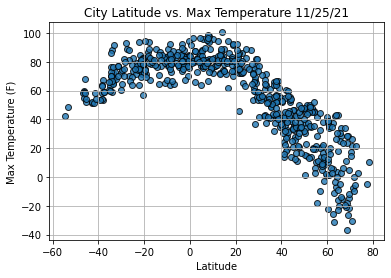

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

####  Plot Latitude vs. Humidity

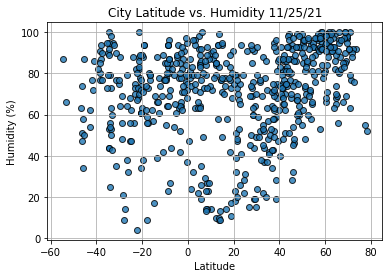

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

####  Plot Latitude vs. Cloudiness

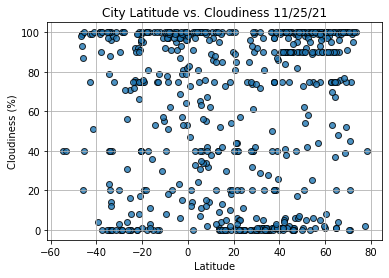

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

#### Plot Latitude vs. Wind Speed

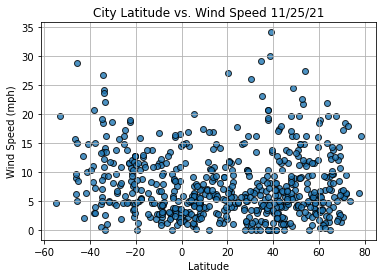

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

#### Use Linear Regression to Find the Relationship Between Variables

#### Create a Linear Regression Function

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

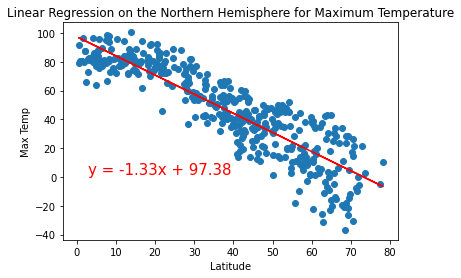

In [27]:
# Linear regression on the Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_axis,y_axis,'Linear Regression on the Northern Hemisphere \
for Maximum Temperature','Max Temp', (3,2))
                       

#### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

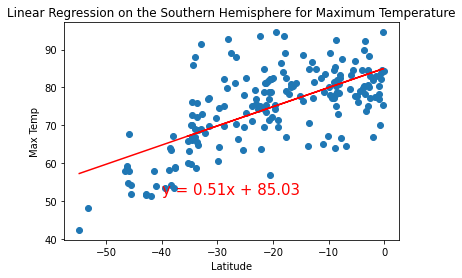

In [28]:
# Linear regression on the Northern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_axis,y_axis,'Linear Regression on the Southern Hemisphere \
for Maximum Temperature','Max Temp', (-40,52))
                       

#### Find the Correlation Between Latitude and Percent Humidity

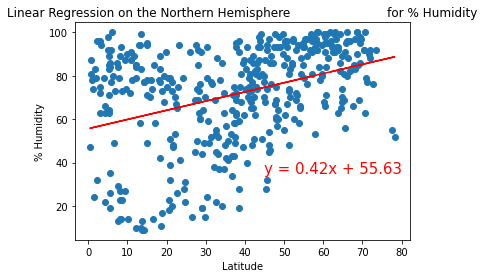

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,35))

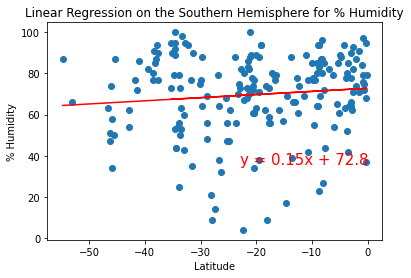

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-23,36))

#### Find the Correlation Between Latitude and Percent Cloudiness

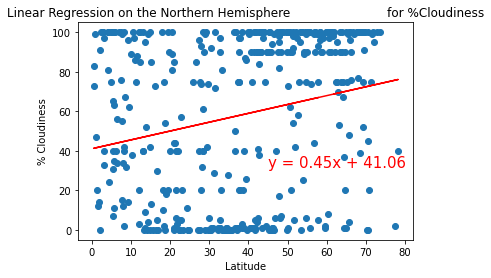

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '% Cloudiness',(45,32))

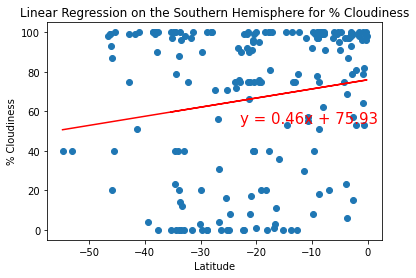

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-23,54))

#### 6.4.5 Find the Correlation Between Latitude and Wind Speed

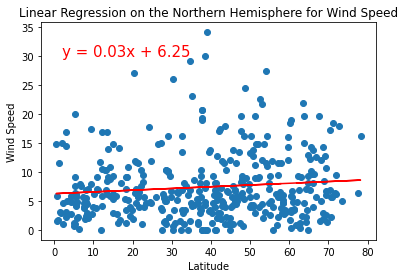

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(2,30))

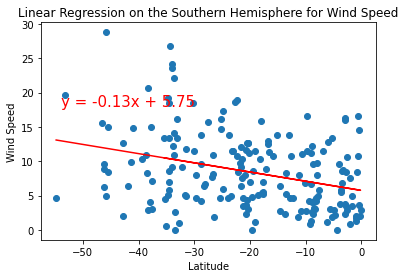

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-54,18))